<a href="https://colab.research.google.com/github/AmanCSE-1/Smart-Weather-Prediction-using-ML/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<em><b>Objective :</b> A Financial organization wants to predict the possible defaulters for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.</em>

# **Importing Libraries and Loading Dataset**

In [8]:
# Importing the fundamental libraries of data science

import pandas as pd                       # For Data Analysis and Preprocessing 
import numpy as np                        # For mathematical operations on data 
import matplotlib.pyplot as plt           # For Visualization and setting graph elements
import seaborn as sns                     # Consists of easy and interactive statistical graphics 

In [16]:
url = "https://raw.githubusercontent.com/AmanCSE-1/Smart-Weather-Prediction-using-ML/main/India%20Weather%20History.csv"
df = pd.read_csv(url)                     # Reading the dataset

df.head()                                 # Printing the first 5 rows of the dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [17]:
df.shape                          # Returns the number of rows and number of columns of dataset

(96453, 12)

In [19]:
df.columns                        # Returns the name of columns of dataset

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

# **Exploratory Data Analysis**

In [20]:
df.info()           # to get a consice summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [21]:
df.describe()         # Used to describe various statistical measures for quantitative columns
                      # Mean, Median(Q2) describes the characteristic of distribution of column
                      # 25% (Q1),  50% (Q2) and 75 (Q3) are Quartiles of the features.
                      # std is Standard Deviation i.e. depicts spread  of the distribution
                      # min and max are known to everybody :)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [22]:
df.isna().sum()             # Returns the sum of rows that contains null values for each column

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [23]:
# Dropping the 'Loud Cover' Column as it contains all rows with value '0'.
# It will not add any value to the model

df.drop('Loud Cover', axis=1, inplace=True)

We will predict Summary, Temperature and Precip Type features for our project.

*   Summary is Categorical variable; so it would require classification algorithms.
*   Temperature is a quantitative variable; hence we would use multiple regression.
*   Precip Type is also a categorical variable; so we will use classification algorithm









In [24]:
# To begin with, we will check the number of different categories in Summary feature

df['Summary'].nunique()

27

In [25]:
#  Since, we get 27 categories, lets first check the occurence of each of the categories; 
#  to if there are categories who have least occurence (they may be outliers/noise) '''

df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [26]:
df['Precip Type'].nunique()

2

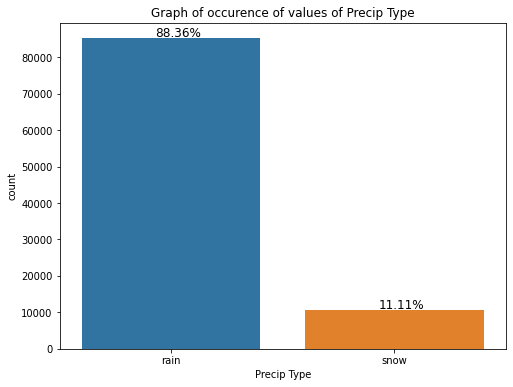

In [27]:
plt.figure(figsize=(8,6))
precip = sns.countplot(x=df['Precip Type'])
plt.title('Graph of occurence of values of Precip Type')

for p in precip.patches:
  txt = str(round(p.get_height()/df.shape[0]*100, 2)) + '%'
  txt_x = p.get_x() + p.get_width()/2 -0.07
  txt_y = p.get_height()+400
  precip.text(txt_x, txt_y, txt, size=12)

plt.show()

# **Data Preprocessing**

First we will perform preprocess the main response variable-'Summary' Feature.

**Summary Feature**

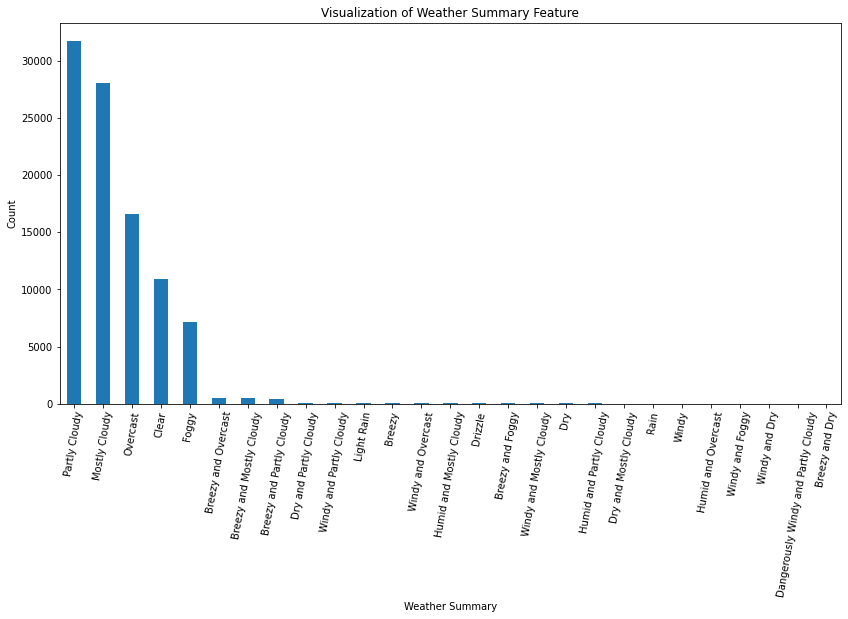

In [28]:
plt.figure(figsize=(14,7))

df['Summary'].value_counts().plot(kind='bar')

plt.ylabel('Count')
plt.xlabel('Weather Summary')
plt.title('Visualization of Weather Summary Feature')
plt.xticks(rotation=80)
plt.show()

By the above visualization plot, we can infer that most of the data lies in the first five categories of Weather Summary Feature. The other categories have infinitesimal occurences. Since, this is a qualitative feature, we must clean this rare occuring categories from out dataset

In [29]:
# We will first estimate their percentage of occurence within the dataset.

# The below code uses "Boolean Masking" technique of python.
# Here, we will not consider the rows have ['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy' and 'Clear']
df[(df['Summary']!='Partly Cloudy') & (df['Summary']!='Mostly Cloudy') &
     (df['Summary']!='Overcast') & (df['Summary']!='Foggy') & (df['Summary']!='Clear')].shape[0]/df.shape[0]*100

2.0642178055633313

Only 2% of our data not lies in the top five categories of Summary Feature. 

But, instead of dropping them all, we observe that there are categories which are intersection between two weather summary. Like, 'Breezy and Partly Cloudy' is the data recorded when weather was both Breezy and Partly Cloudy. Instead of dropping this observations (rows), we will add their occurence to 'Partly Cloudy'

Similarly, with other categories as well.

In [32]:
# storing the index for unclean data for preprocessing
uncleanData_index = df[(df['Summary']!='Partly Cloudy') & (df['Summary']!='Mostly Cloudy') &
     (df['Summary']!='Overcast') & (df['Summary']!='Foggy') & (df['Summary']!='Clear')].index

In [33]:
pd.options.mode.chained_assignment = None

# Creating a copy of dataset
df_preprocessed = df.copy()

# Iterating through the unclean_data index
for row in uncleanData_index:

      # Using string matching technique
      if 'Partly Cloudy' in df_preprocessed['Summary'][row]:
          df_preprocessed['Summary'][row] = 'Partly Cloudy'
          
      elif 'Mostly Cloudy' in df_preprocessed['Summary'][row]:
          df_preprocessed['Summary'][row] = 'Mostly Cloudy'
          
      elif 'Overcast' in df_preprocessed['Summary'][row]:
          df_preprocessed['Summary'][row] = 'Overcast'
      
      elif 'Foggy' in df_preprocessed['Summary'][row]:
          df_preprocessed['Summary'][row] = 'Foggy'

In [34]:
# We check that preprocessed data has retained all the rows of the original dataset 

df_preprocessed.shape

(96453, 11)

In [35]:
df_preprocessed['Summary'].nunique()

13

In [37]:
df_preprocessed['Summary'].value_counts()

Partly Cloudy     32290
Mostly Cloudy     28699
Overcast          17177
Clear             10890
Foggy              7187
Light Rain           63
Breezy               54
Drizzle              39
Dry                  34
Rain                 10
Windy                 8
Windy and Dry         1
Breezy and Dry        1
Name: Summary, dtype: int64

In [43]:
uncleanData_index = df_preprocessed[(df_preprocessed['Summary']!='Partly Cloudy') & (df_preprocessed['Summary']!='Mostly Cloudy') &
     (df_preprocessed['Summary']!='Overcast') & (df_preprocessed['Summary']!='Foggy') & (df_preprocessed['Summary']!='Clear')].index

In [44]:
uncleanData_index.shape[0]/df.shape[0]*100

0.21772262138036141

In [46]:
df_preprocessed.drop(index=uncleanData_index, inplace=True)

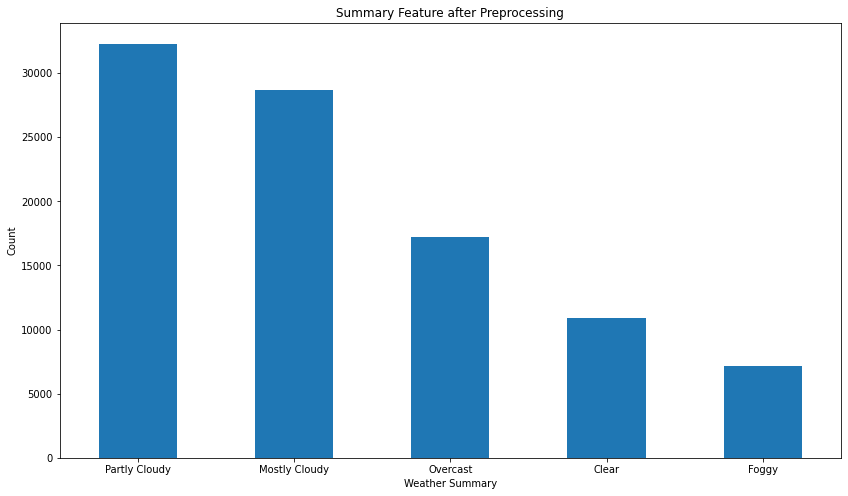

In [47]:
plt.figure(figsize=(14,8))

df_preprocessed['Summary'].value_counts().plot(kind='bar')

plt.ylabel('Count')
plt.xlabel('Weather Summary')
plt.title('Summary Feature after Preprocessing')
plt.xticks(rotation=0)
plt.show()